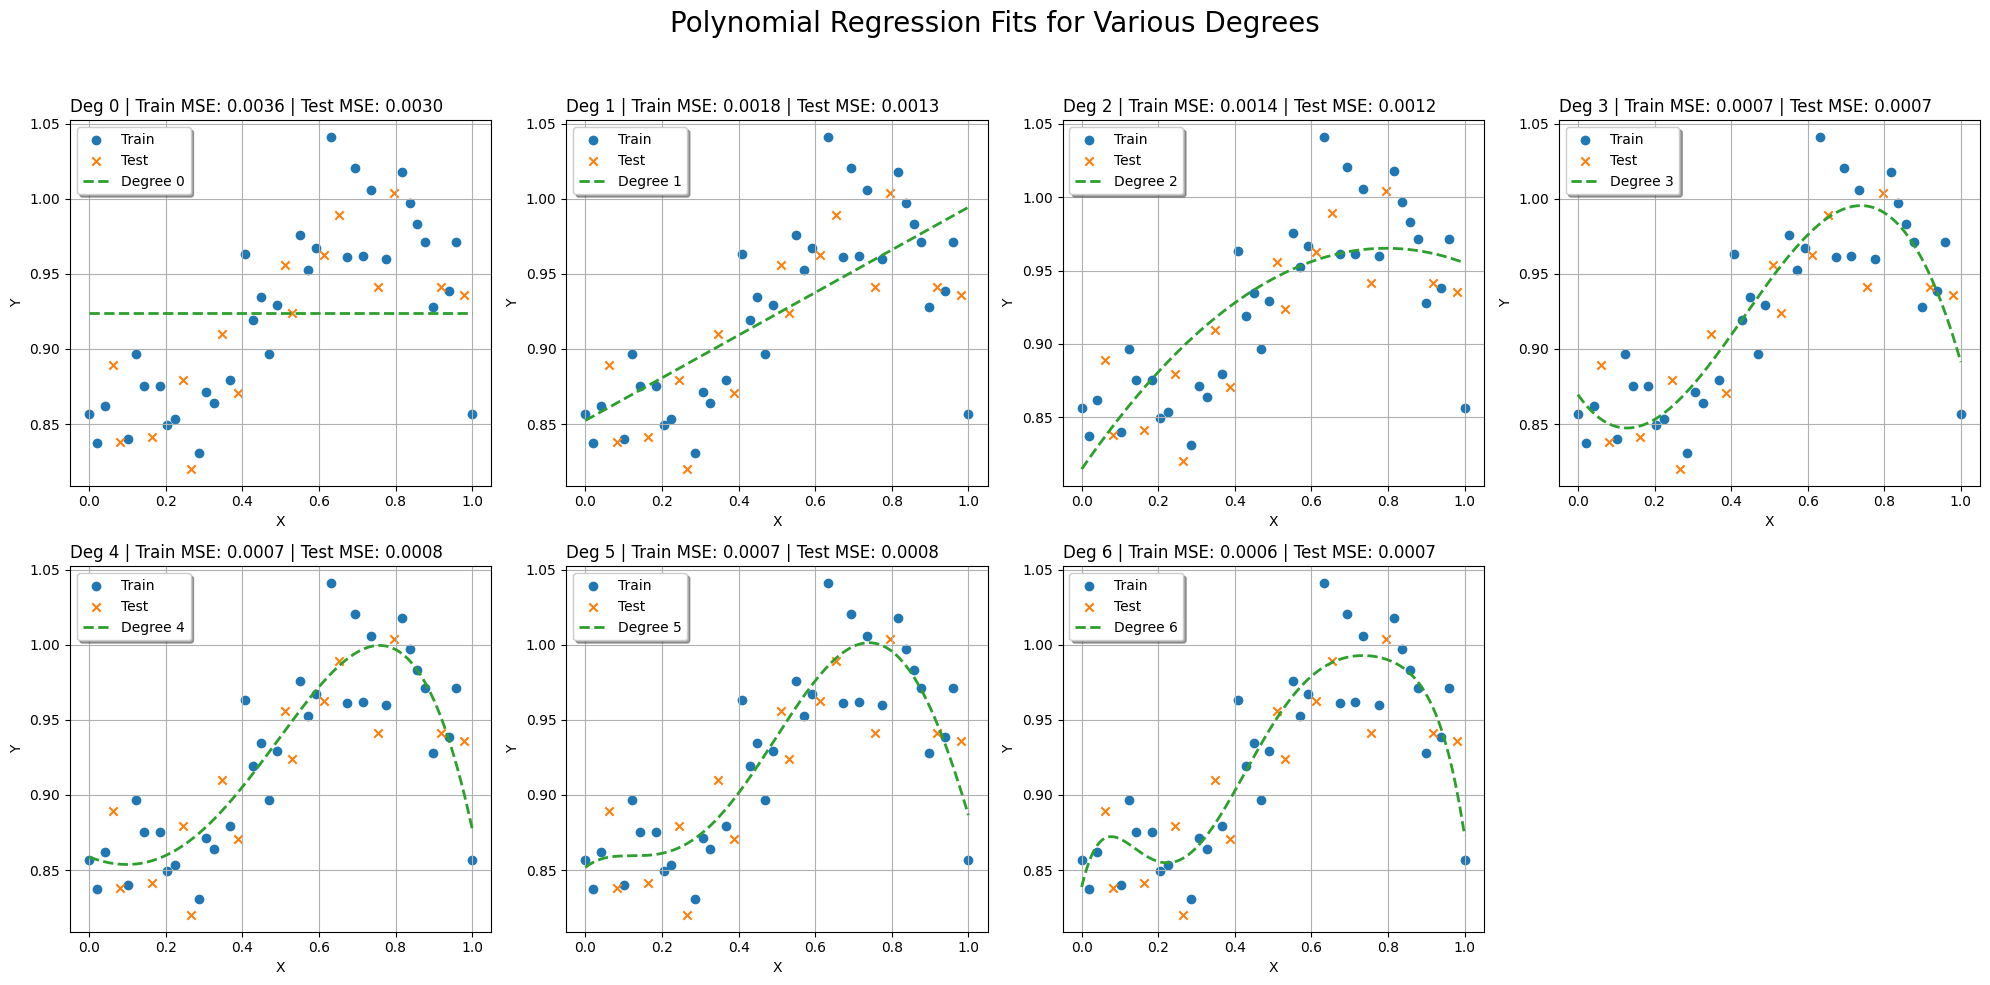

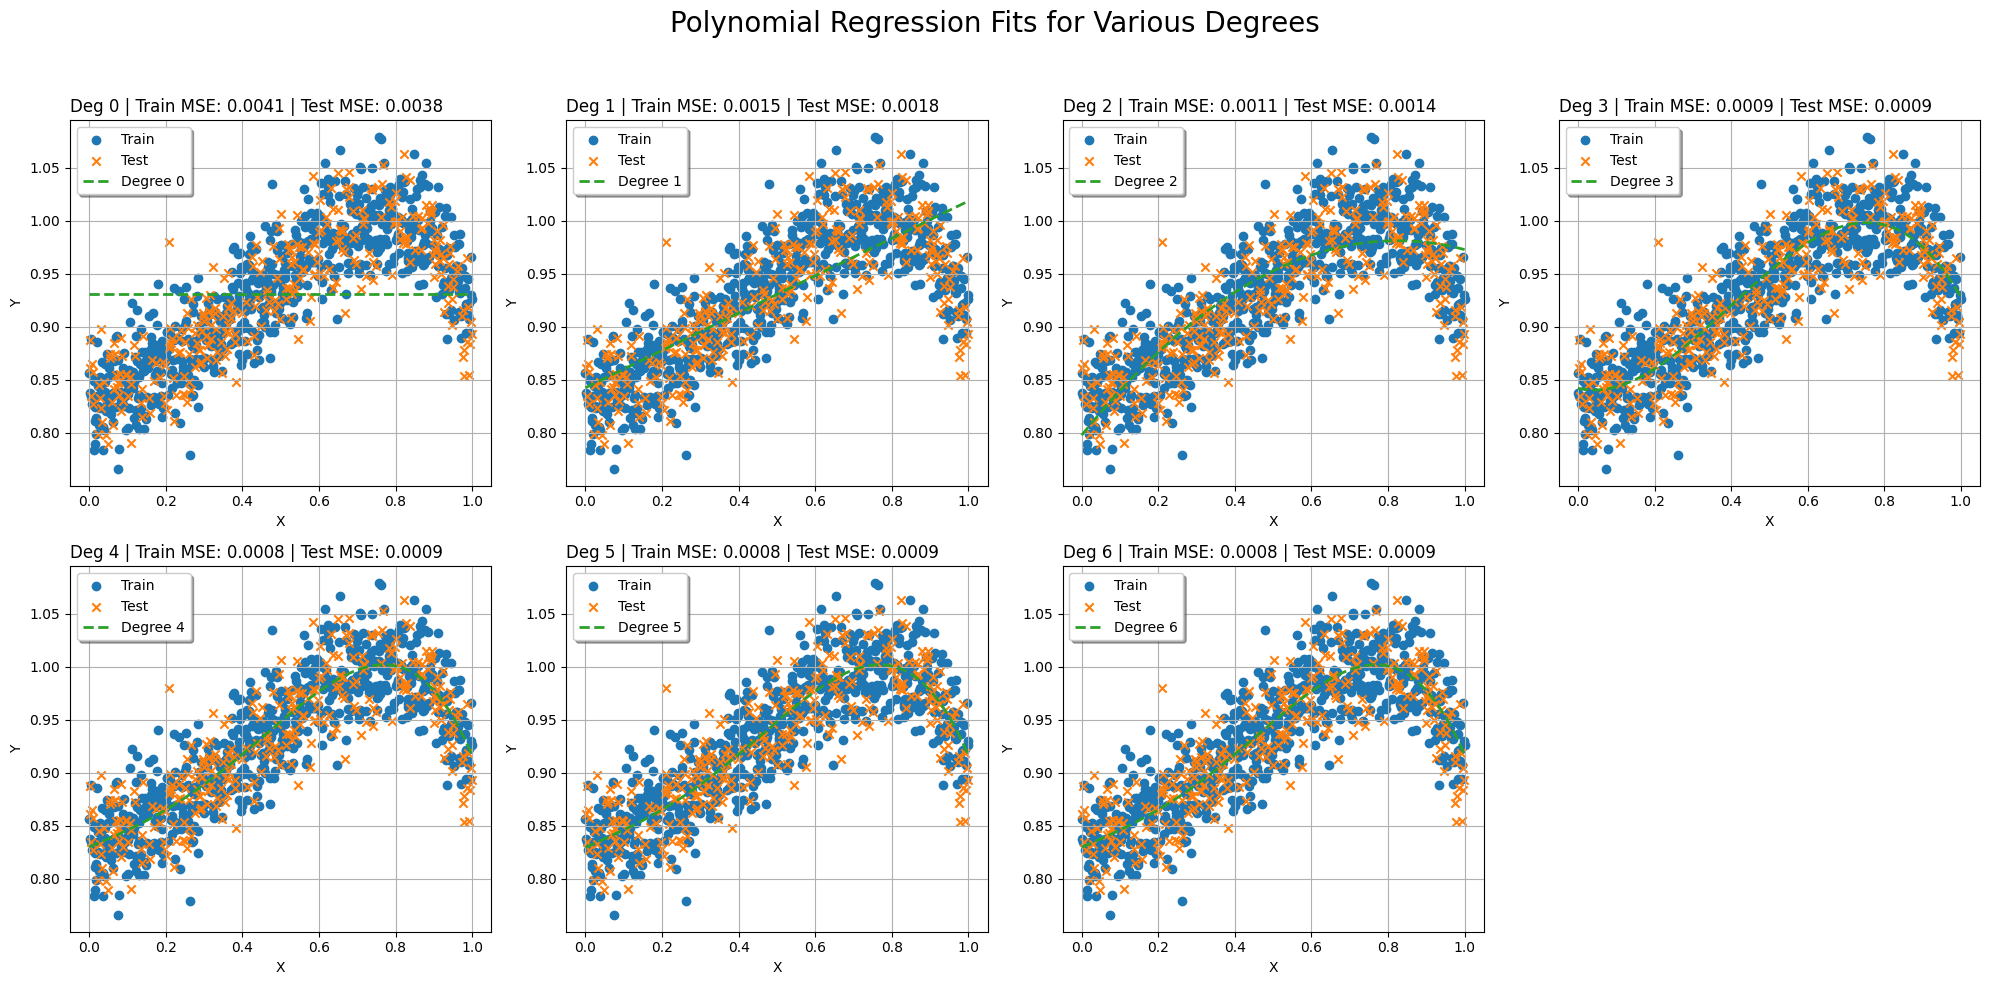

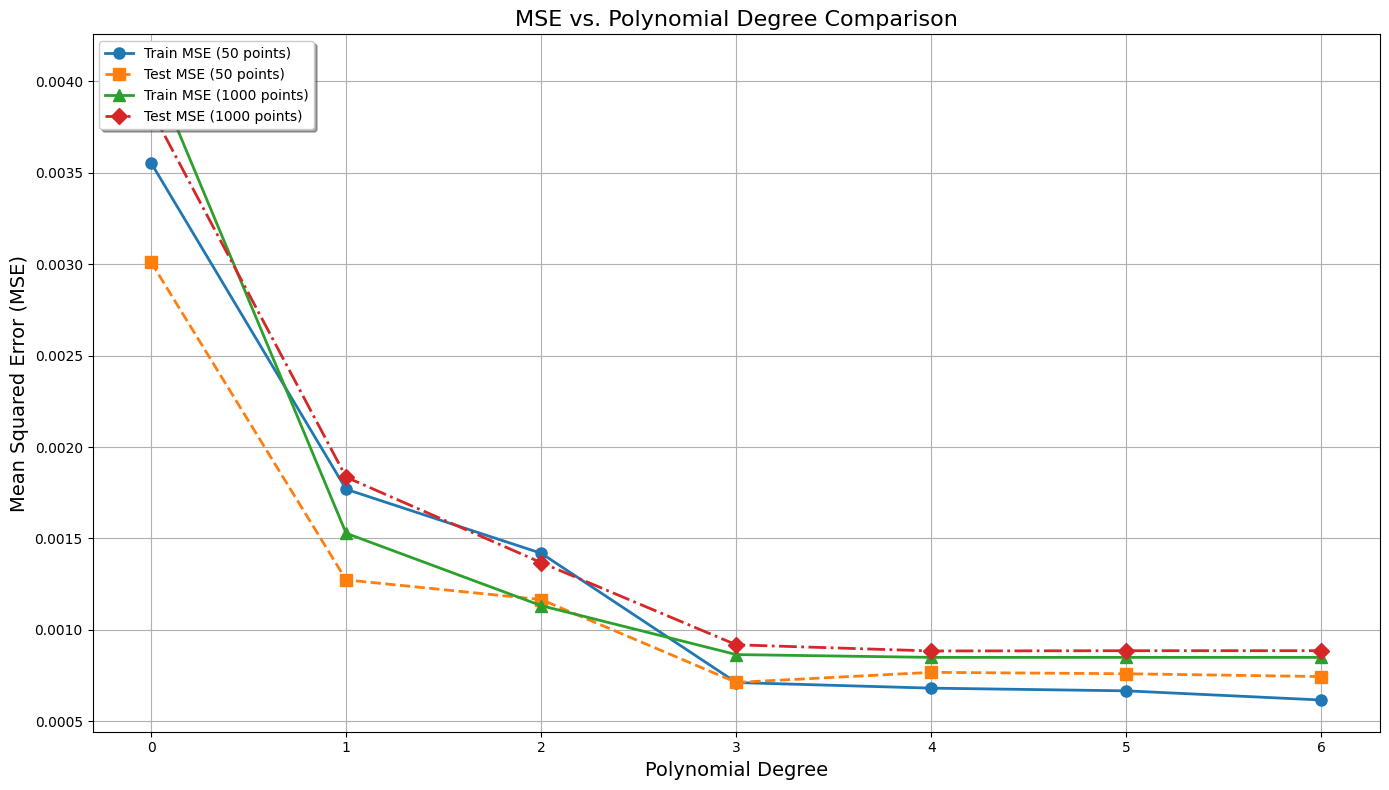

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate dataset
def generate_data(n_points, noise_std=0.03, seed=42):
    np.random.seed(seed)
    x = np.linspace(0, 1, n_points)
    noise = np.random.normal(0, noise_std, size=n_points)
    y = np.sin(1 + x**2) + noise
    return x, y

# Fit polynomial models and compute MSE
def fit_polynomial_models(x_train, y_train, x_test, y_test, max_degree=6, x_fit_range=(0, 1), x_fit_points=1000):
    train_errors, test_errors = [], []
    degrees = range(max_degree + 1)

    plt.figure(figsize=(20, 10))

    for degree in degrees:
        poly = PolynomialFeatures(degree)
        x_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
        x_test_poly = poly.transform(x_test.reshape(-1, 1))

        model = LinearRegression()
        model.fit(x_train_poly, y_train)

        y_train_pred = model.predict(x_train_poly)
        y_test_pred = model.predict(x_test_poly)

        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)

        train_errors.append(train_mse)
        test_errors.append(test_mse)

        x_fit = np.linspace(*x_fit_range, x_fit_points)
        y_fit = model.predict(poly.transform(x_fit.reshape(-1, 1)))

        plt.subplot(2, 4, degree + 1)
        plt.scatter(x_train, y_train, color='#1f77b4', label='Train', marker='o')
        plt.scatter(x_test, y_test, color='#ff7f0e', label='Test', marker='x')
        plt.plot(x_fit, y_fit, color='#2ca02c', linestyle='--', linewidth=2, label=f'Degree {degree}')
        plt.title(f'Deg {degree} | Train MSE: {train_mse:.4f} | Test MSE: {test_mse:.4f}', fontsize=12, loc='left')
        plt.xlabel('X', fontsize=10)
        plt.ylabel('Y', fontsize=10)
        plt.legend(frameon=True, shadow=True)
        plt.grid(True)

    plt.suptitle("Polynomial Regression Fits for Various Degrees", fontsize=20)
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    return train_errors, test_errors

# Generate datasets and fit models
x_50, y_50 = generate_data(50)
x_train_50, x_test_50, y_train_50, y_test_50 = train_test_split(x_50, y_50, test_size=0.3, random_state=42)
train_errors_50, test_errors_50 = fit_polynomial_models(x_train_50, y_train_50, x_test_50, y_test_50)

x_1000, y_1000 = generate_data(1000)
x_train_1000, x_test_1000, y_train_1000, y_test_1000 = train_test_split(x_1000, y_1000, test_size=0.3, random_state=42)
train_errors_1000, test_errors_1000 = fit_polynomial_models(x_train_1000, y_train_1000, x_test_1000, y_test_1000)

# Compare MSE across polynomial degrees
plt.figure(figsize=(14, 8))
plt.plot(range(7), train_errors_50, 'o-', label='Train MSE (50 points)', color='#1f77b4', markersize=8, linewidth=2)
plt.plot(range(7), test_errors_50, 's--', label='Test MSE (50 points)', color='#ff7f0e', markersize=8, linewidth=2)
plt.plot(range(7), train_errors_1000, '^-', label='Train MSE (1000 points)', color='#2ca02c', markersize=8, linewidth=2)
plt.plot(range(7), test_errors_1000, 'D-.', label='Test MSE (1000 points)', color='#d62728', markersize=8, linewidth=2)
plt.xlabel('Polynomial Degree', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
plt.title('MSE vs. Polynomial Degree Comparison', fontsize=16)
plt.legend(loc='upper left', frameon=True, shadow=True)
plt.grid(True)
plt.tight_layout()
plt.show()
